<a href="https://colab.research.google.com/github/ninavankalas/OMM/blob/main/%D0%9E%D0%9C%D0%9C_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Условие задачи** \\
Используя схему бегущего счета и итерационные методы, решить задачу:
$$\frac{\partial u}{\partial t} + 2ue^{-u^2}\frac{\partial u}{\partial x} = 0, 0 < x < 1$$
$$u(x,0) = sin(\frac{\pi x}{2})$$
$$u(0, t) = 0$$

**Исследование характеристик** \\
В точках пересечения проекций его характеристик, решение будет разрывным. Посмотрим как будут вести себя проекции характеристик в заданных областях. Уравнение характеристик будет иметь вид: \\
$dt = \frac{dx}{-2ue^{-u^2}}$

$\int_{t_{0}}^t dt = \int_{x_0}^x \frac{dx}{-2ue^{-u^2}}  $

\begin{cases}
  u_0 = u(x_0,t_0) = const \\
  x - x_0 = 2u e^{-u^2}(t-t_0)\\
\end{cases}

Используя граничное и начальное условия, получим два семейства характеристик: \\
$t_0 = 0: u_0 = sin(\frac{\pi x_0}{2}), x = x_0 + 2t sin(\frac{\pi x_0}{2})e^{-sin^2(\frac{\pi x}{2})}$ \\
$x_0 = 0: u_0 = 0, x = 0 $


Импорт библиотек:

In [2]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from PIL import Image
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/my-drive' 

Mounted at /content/gdrive


Функция сha(t) - первое семейство характеристик

In [ ]:
def cha(t):
  return [(2*t*sin(0.5*pi*x0)*exp((sin(0.5*x0*pi))**2) + x0) for x0 in np.arange(0,1.1,0.1)]

t_list = np.arange(0,1.1,0.1)
graphs = [cha(t) for t in t_list]

Построим графики:

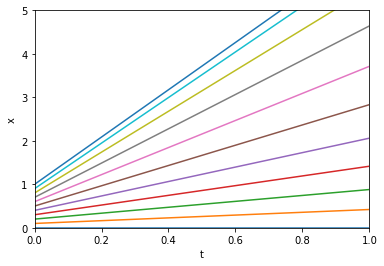

In [ ]:
plt.ylim(0,5)
plt.xlim(0,1)
plt.plot(t_list, graphs) 
plt.ylabel('x')
plt.xlabel('t')
plt.show()

Видно, что на промежутке $0≤x<1$ характеристики не пересекаются, а значит, в этой области опрокидывание волны отсутствует. Во всей области решение будет представимо через разностную схему.

# **Численное решение**
Построим разностную схему для нашей задачи. Введем в области $\Omega=\{(𝑥̃,𝑡):0≤𝑥<1,0<𝑡≤𝑇\}$ сетку с шагом h по координате и шагом τ по времени:

$\omega_h \omega_{\tau} $ = 
\begin{cases}
  x_n = nh, n = \overline{0,N-1}, h = \frac{1}{N - 1} \\
  t_n = m\tau, m = \overline{0, M - 1}, \tau = \frac{T}{M - 1}\\
\end{cases}

$$\frac{\partial u}{\partial t} + 2ue^{-u^2}\frac{\partial u}{\partial x} = 0$$
$$\frac{\partial u}{\partial t} + \frac{\partial [e^{-u^2}]}{\partial x} = 0$$

Введем теперь сеточную функцию – функцию, определенную в узлах сетки: $𝑦_{𝑛m}=𝑢(𝑥_n,𝑡_m)$. Будем использовать четырехточечный шаблон. В таком случае разностная схема имеет следующий вид:

$$\frac{1}{2}\frac{e^{-𝑦^2_{𝑛+1,m+1}} - e^{-𝑦^2_{n,m+1}} + e^{-𝑦^2_{𝑛+1,m}} - e^{-𝑦^2_{𝑛m}}}{h} - \frac{1}{2}\frac{y_{n+1,m+1} - y_{n+1,m} + y_{n, m+1} - y_{n,m}}{\tau}$$

А начальное и граничное условия:
\begin{cases}
  y_n^0 = sin(\frac{\pi x_n}{2}) \\
  y_0^m = 0
\end{cases}

Перепишем получившееся уравнение в следующем виде:
$f(y^{m+1}_{n+1}) = \frac{y^{m+1}_{n+1}}{2\tau} + \frac{e^{-𝑦^2_{𝑛+1,m+1}}}{2h} + \frac{y_n^{m+1} - y_n^m - y_{n+1}^m}{2\tau} - \frac{e^{-𝑦^2_{n,m+1}} -  e^{-𝑦^2_{𝑛+1,m}}  +  e^{-𝑦^2_{𝑛m}}}{2h}$

Будем решать его итерационным методом Ньютона.
$y_{n+1}^{m+1(k+1)} = y_{n+1}^{m+1(k)} - \frac{f(y_{n+1}^{m+1(k)})}{f'(y_{n+1}^{m+1(k)})}$

До достижения заданной точности $\epsilon$:

$|y_{n+1}^{m+1(k+1)} - y_{n+1}^{m+1(k)}| < \epsilon$


In [ ]:
epsilon = 0.000001
N = 1000
M = 1000
h = 1.0/(N-1)
tau = 1.0/(M-1)
T_begin = 0; T_end = 1
X_begin = 0; X_end = 1



Создание и инициализация массива - заполняем граничными значениями:

In [ ]:
y=np.zeros((M,N))

for n in np.arange(N):
        y[0][n] = (sin(pi * h * n * 0.5))
for m in np.arange(M):
        y[m][0] = 0

#print(y)

Определим вспомогательные функции и построим разностную схему:

In [ ]:
def F(s, n):
	return (exp(-y[s][n]*y[s][n]))



	#return (x/(2.0*t) - exp(-x*x)/(2.0*h) + (u[s][n-1] - u[s-1][n-1] - u[s-1][n])/(2.0*t) - (-F(s, n-1) + F(s-1, n) - F(s-1, n-1))/(2.0*h))
 
def f(mp1, np1): #разностная схема
    n = np1-1
    m = mp1-1
    return (float(y[mp1][n]-y[m][n] + y[mp1][np1]-y[m][np1]) / (2.0*tau) - (F(mp1, np1)-F(mp1,n) + F(m, np1)-F(m,n)) / (2.0*h))

def df(mp1,np1):
    return (1/(2.0*tau) + y[mp1][np1]/(2. * h))




Выполняем, непосредственно, метод Ньютона:

In [ ]:
for m in np.arange(M)[0:M-1]:
    for n in np.arange(N)[0:N-1]:
        eps = epsilon + 1;
        while eps > epsilon:
            ep = f(m+1, n+1)/df(m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - ep
            eps = np.abs(ep)

Решение представим графически:

In [ ]:
from IPython.display import HTML
from matplotlib import animation

from mpl_toolkits.mplot3d import axes3d

tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#X, T, y = axes3d.get_test_data(0.1)
surf = ax.plot_wireframe(X, T, y, rstride=10,cstride=1)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

def animate(frame):
    ax.view_init(30, frame)
    plt.draw()
    plt.pause(.001)
    return fig
anim = animation.FuncAnimation(fig, animate, frames=150, interval=50)
HTML(anim.to_html5_video())


<IPython.core.display.Javascript object>

**Устойчивость**  \\
Исследование разностной схемы на устойчивость с помощью критерия Неймана.

Для данной схемы известно, что она аппроксимирует задачу со вторым порядком по времени и вторым порядком по координате. Исследование будет проводиться с помощью спектрального критерия Неймана. Выберем точку ($𝑥̃,𝑡̃$) внутри области, где рассматривается задача, и зафиксируем коэффициенты в данной точке (принцип замороженных коэффициентов). Схема примет вид:
$$\frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} -y_{n+1}^m}{2\tau} + C \frac{y_{n+1}^{m+1} - y_n^{m+1} + y_{n+1}^m -  y_n^m  }{2h} = 0$$, $C = 2ue^{u^2}$

Будем искать решение с помощью гармоник: 
$y^m_n = \lambda^m e^{i\alpha n}$

$$\frac{\lambda^{m + 1} e^{i\alpha {n}} - \lambda^{m} e^{i\alpha {n}} + \lambda^{m+1} e^{i\alpha {n+1}} - \lambda^{m} e^{i\alpha {n+1}}}{2 \tau} + C\frac{\lambda^{m+1} e^{i\alpha {n+1}} -  \lambda^{m+1} e^{i\alpha {n}} + \lambda^{m} e^{i\alpha {n+1}} - \lambda^{m} e^{i\alpha {n}}}{2h}$$

$$\frac{\lambda - 1 + \lambda e^{i\alpha} - e^{i\alpha}}{\tau} + C\frac{\lambda e^{i\alpha} - \lambda +  e^{i\alpha} - 1}{h}$$

$$\lambda = \frac{1 + \frac{C \tau}{h} + e^{i \alpha}(1 - \frac{C \tau}{h})}{1 - \frac{C \tau}{h} + e^{i \alpha}(1 + \frac{C \tau}{h}) }$$

$|\lambda| = 1$ -  спектральный критерий Неймана выполнен. Из устойчивости и аппроксимации следует сходимость.

**Условие Куранта**

Перепишем задачу в виде:


$$\begin{aligned}
  u^{m+1}_{n+1}(1+\frac{C\tau}{h})+u^{m+1}_n(1-\frac{C\tau}{h})=u^{m}_{n+1}(1-\frac{C\tau}{h})+u^{m}_n(1+\frac{C\tau}{h})+2 \tau \epsilon^{m}_n
  \end{aligned}$$

Рассмотрим нормы:
  $$\begin{aligned}
    \|u^{m+1}\|(1+\frac{C\tau}{h})+\|u^{m+1}\|(1-\frac{C\tau}{h}) \leq 
    \|u^{m}\|(1-\frac{C\tau}{h})+\|u^{m}\|(1+\frac{C\tau}{h})+2\tau \|\epsilon ^{m}\| 
  \end{aligned}$$

Подставляя их в уравнение, при условии $(1 - C\tau/h) \geq 0 $ получим оценку:
$\|u^{m+1} \| \leq \|u^m\| + \tau \| \epsilon \|$ \\

Тогда по индукции: 
$$\begin{aligned}
    \| u^{m+1}\| \leq \|u^0\| + m\tau\|\epsilon\|
     \leq \|u^0\| + T\|\epsilon\|
  \end{aligned}$$
Значит, разностная схема является условно устойчивой для любых соотношений шагов по времени и координате.


**Геометрический критерий** 

Проведем из точки, где ищется решение уравнения, характеристику. Характеристиками в данном случае являются прямые. Если данная прямая пересекает отрезок, соединяющий точки в которых решение известно, то схема является устойчивой. В иных случаях – неустойчивой.

Шаблон имеет вид:

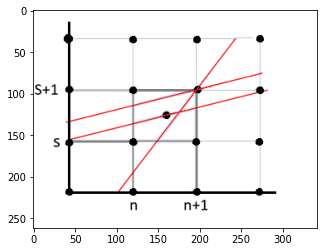

In [13]:
img = Image.open('/content/gdrive/My Drive/pic.png')
imgplot = plt.imshow(img)


Из рисунка видно, что любая характеристика, проходящая через заданную точку, будет пересекать отрезки, соединяющие точки в которых известны значения. Таким образом, схема безусловно устойчива.